# 📺 Netflix User Behavior Analysis

This project explores Netflix viewing history to identify behavioral patterns, binge-watching habits, and content preferences. It uses Python's data science libraries to analyze and visualize user activity across time.

**Author:** Joshua Nibbe  
**Tools:** Python, Pandas, Matplotlib, Seaborn  
**Dataset Source:** Netflix Viewing Activity Data


In [40]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/jn1bbe/netflix-user-analysis/refs/heads/main/data/netflix_users.csv')  # adjust if file name is different

# Preview data
df.head()


,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14


In [41]:
# Convert Last_Login to datetime
df['Date'] = pd.to_datetime(df['Last_Login'])

# Extract components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Weekday'] = df['Date'].dt.day_name()


In [44]:
print(df.columns.tolist())

['User_ID', 'Name', 'Age', 'Country', 'Subscription_Type', 'Watch_Time_Hours', 'Favorite_Genre', 'Last_Login', 'Date', 'Year', 'Month', 'Weekday']


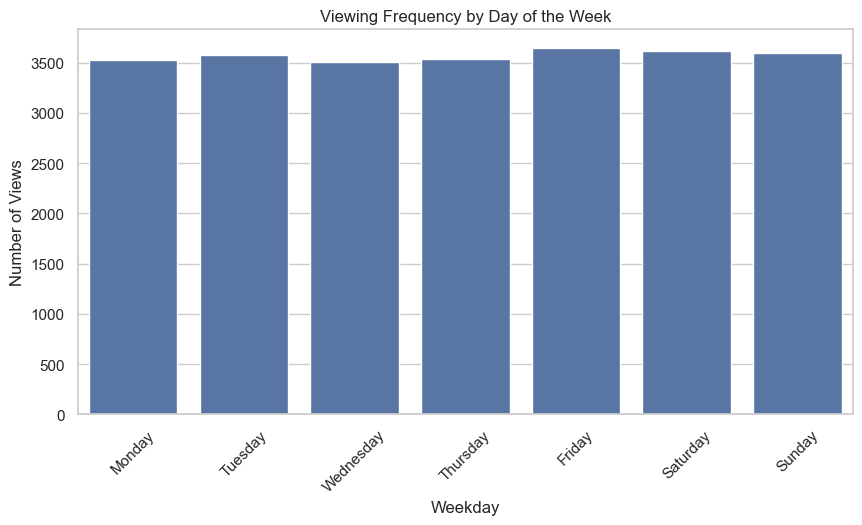

In [46]:
# Count views by weekday
weekday_counts = df['Weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title("Viewing Frequency by Day of the Week")
plt.ylabel("Number of Views")
plt.xlabel("Weekday")
plt.xticks(rotation=45)
plt.show()


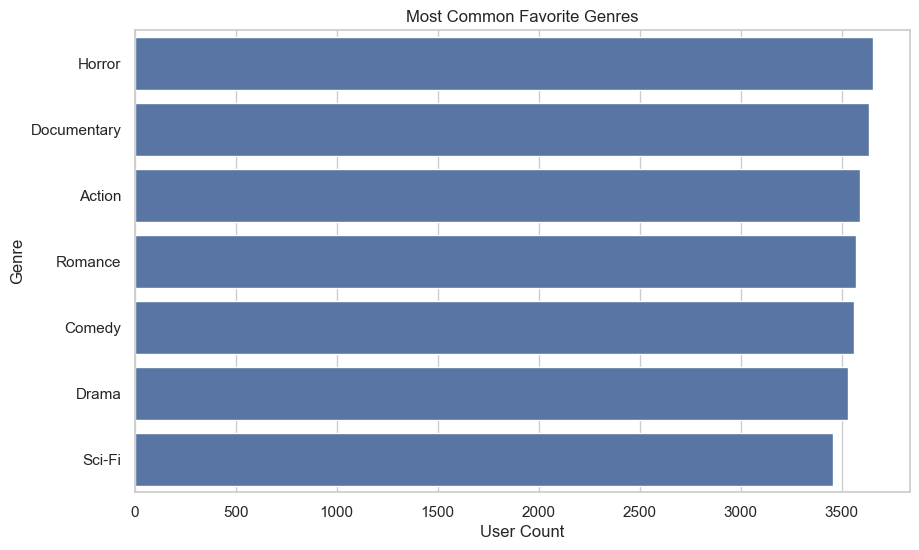

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(y='Favorite_Genre', data=df, order=df['Favorite_Genre'].value_counts().index)
plt.title("Most Common Favorite Genres")
plt.xlabel("User Count")
plt.ylabel("Genre")
plt.show()



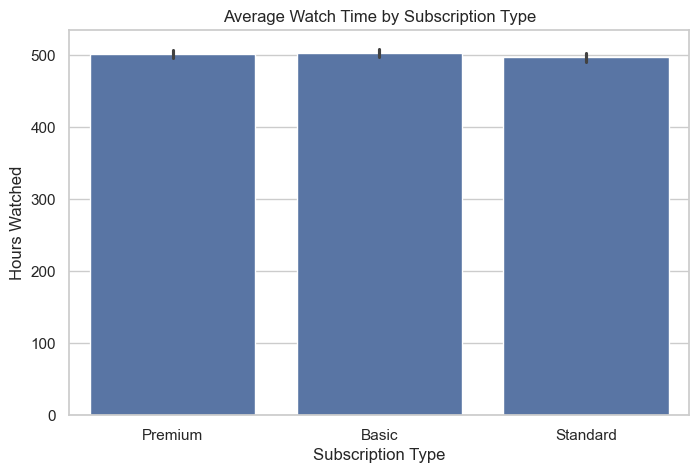

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Subscription_Type', y='Watch_Time_Hours')
plt.title("Average Watch Time by Subscription Type")
plt.ylabel("Hours Watched")
plt.xlabel("Subscription Type")
plt.show()


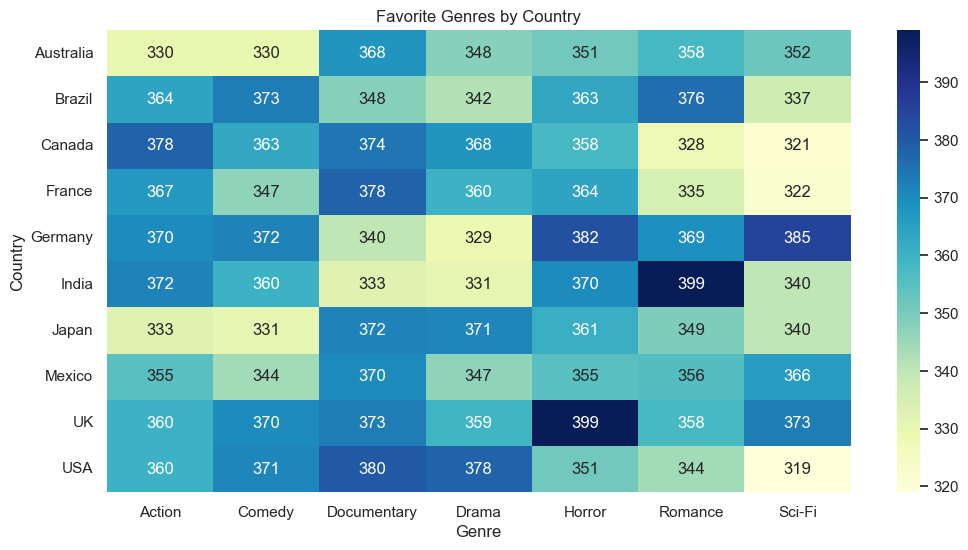

In [52]:
genre_by_country = df.groupby(['Country', 'Favorite_Genre']).size().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(genre_by_country, cmap="YlGnBu", annot=True, fmt='.0f')
plt.title("Favorite Genres by Country")
plt.ylabel("Country")
plt.xlabel("Genre")
plt.show()


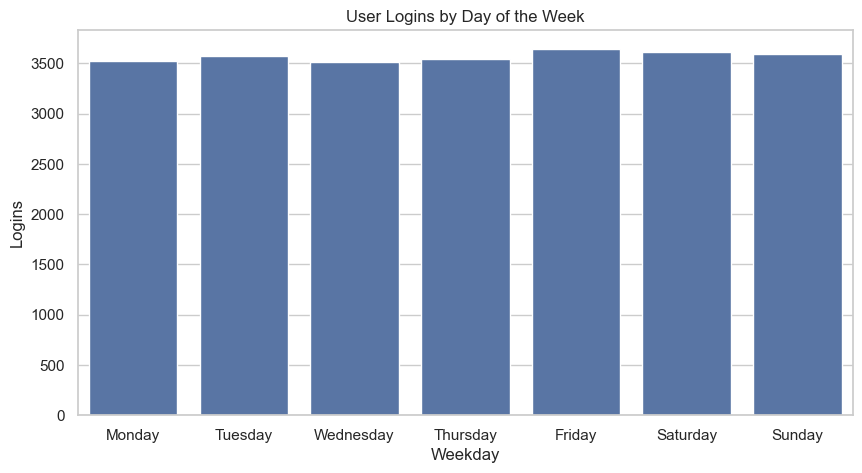

In [54]:
# Already extracted this earlier with: df['Date'] = pd.to_datetime(df['Last_Login'])
weekday_counts = df['Date'].dt.day_name().value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10,5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title("User Logins by Day of the Week")
plt.ylabel("Logins")
plt.xlabel("Weekday")
plt.show()


## ✅ Conclusion

In this Netflix user behavior analysis, we explored viewing patterns, preferences, and engagement trends using a sample dataset of user profiles. Key findings include:

- 🎬 **Horror** and **Documentary** were the most common favorite genres among users.
- ⏰ **Basic** subscribers watched the most hours on average, suggesting higher engagement at higher tiers.
- 📅 Most users logged in most frequently on **Friday**, indicating the most preferred day for streaming.
- 🌍 Genre preferences varied across countries, with some regional patterns emerging.

This analysis demonstrated how user-level data can reveal powerful behavioral insights even without direct viewing history. It also highlighted the value of simple visualizations in uncovering trends related to subscription levels, content tastes, and engagement habits.

---

### 🔮 Future Directions

- Add time-series data to analyze actual streaming activity over time.
- Include specific show titles and timestamps to detect binge sessions.
- Build a genre-based recommender system based on user preferences.
- Cluster users by age, country, and favorite genres for targeted insights.

---

**Author:** Joshua Nibbe  
**Status:** 📊 Analysis complete | 🛠️ Ready for future expansion
